In [22]:
# imports
import pandas as pd
from PyQt5.QtWidgets import QApplication, QFileDialog, QWidget
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np

In [2]:

# Loading Data

# Create a simple GUI application
app = QApplication([])

# Create a QWidget to use as a window
window = QWidget()

# Open a file dialog to select a CSV file
file_path, _ = QFileDialog.getOpenFileName(
    window, 
    "Select a CSV file", 
    "", 
    "CSV Files (*.csv)"
)

# Check if a file was selected
if file_path:
    # Load the dataset
    original_data = pd.read_csv(file_path)

    # Inspect the first few rows
    print(original_data.head())
else:
    print("No file selected.")







          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
# Check for missing values
missing_summary = original_data.isnull().sum()
print(missing_summary)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


c:\Users\FUAT\Documents\kaim-week-0\solar-farm-analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


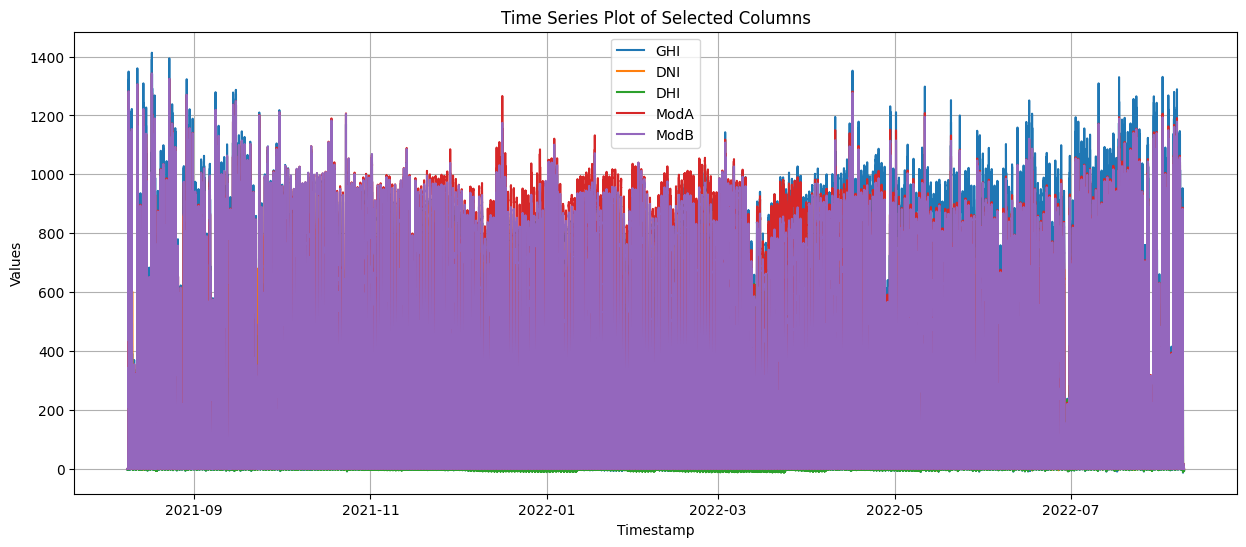

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Timestamp column is in datetime format
if 'Timestamp' in original_data.columns:
    original_data['Timestamp'] = pd.to_datetime(original_data['Timestamp'])

# Filter for the first 10 rows (adjust this limit if needed)
top_data = original_data

# Check for existence of required columns and plot
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

plt.figure(figsize=(15, 6))
for column in columns_to_check:
    if column in top_data.columns:
        plt.plot(top_data['Timestamp'], top_data[column], label=f"{column}")

plt.title("Time Series Plot of Selected Columns")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()



In [47]:

# original_data.tail(5)
original_data.describe()

Timestamp            GHI            DNI  \
count                         513965  513965.000000  513965.000000   
mean   2022-02-07 00:05:30.619010816     232.507816     166.305778   
min              2021-08-09 00:01:00     -11.100000      -7.800000   
25%              2021-11-07 20:17:00      -2.000000      -0.500000   
50%              2022-02-05 21:46:00       0.000000      -0.200000   
75%              2022-05-09 19:49:00     456.200000     315.800000   
max              2022-08-09 00:00:00    1212.000000     952.300000   
std                              NaN     326.207308     262.371166   

                 DHI           ModA           ModB           Tamb  \
count  513965.000000  513965.000000  513965.000000  513965.000000   
mean      108.678362     228.806921     221.674550      28.113709   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.200000       0.000000       0.000000      24.100000   
50%        -0.100000       2.500000       2.500000      27.900000   
75%       208.100000     436.000000     421.700000      32.200000   
max       558.300000    1266.100000    1200.000000      43.800000   
std       149.190897     322.345381     312.682317       5.919362   

                  RH             WS         WSgust        WSstdev  \
count  513965.000000  513965.000000  513965.000000  513965.000000   
mean       54.688548       2.051073       2.719781       0.463554   
min         2.100000       0.000000       0.000000       0.000000   
25%        29.100000       0.900000       1.300000       0.400000   
50%        55.200000       1.900000       2.400000       0.500000   
75%        80.300000       3.000000       3.900000       0.600000   
max       100.000000       6.500000      12.200000       4.200000   
std        27.979683       1.500275       1.897059       0.260627   

                  WD        WDstdev             BP       Cleaning  \
count  513965.000000  513965.000000  513965.000000  513965.000000   
mean      153.493414       8.495709     994.184898       0.000936   
min         0.000000       0.000000     985.000000       0.000000   
25%        57.800000       3.500000     993.000000       0.000000   
50%       182.600000       8.500000     994.000000       0.000000   
75%       235.200000      12.200000     996.000000       0.000000   
max       360.000000      99.400000    1003.000000       1.000000   
std       102.816738       6.388664       2.466358       0.030578   

       Precipitation          TModA          TModB  
count  513965.000000  513965.000000  513965.000000  
mean        0.001116      34.936522      32.269252  
min         0.000000       9.000000       8.100000  
25%         0.000000      24.100000      23.500000  
50%         0.000000      29.700000      28.700000  
75%         0.000000      46.200000      41.100000  
max         2.300000      81.000000      72.500000  
std         0.022571      14.671186      12.306097

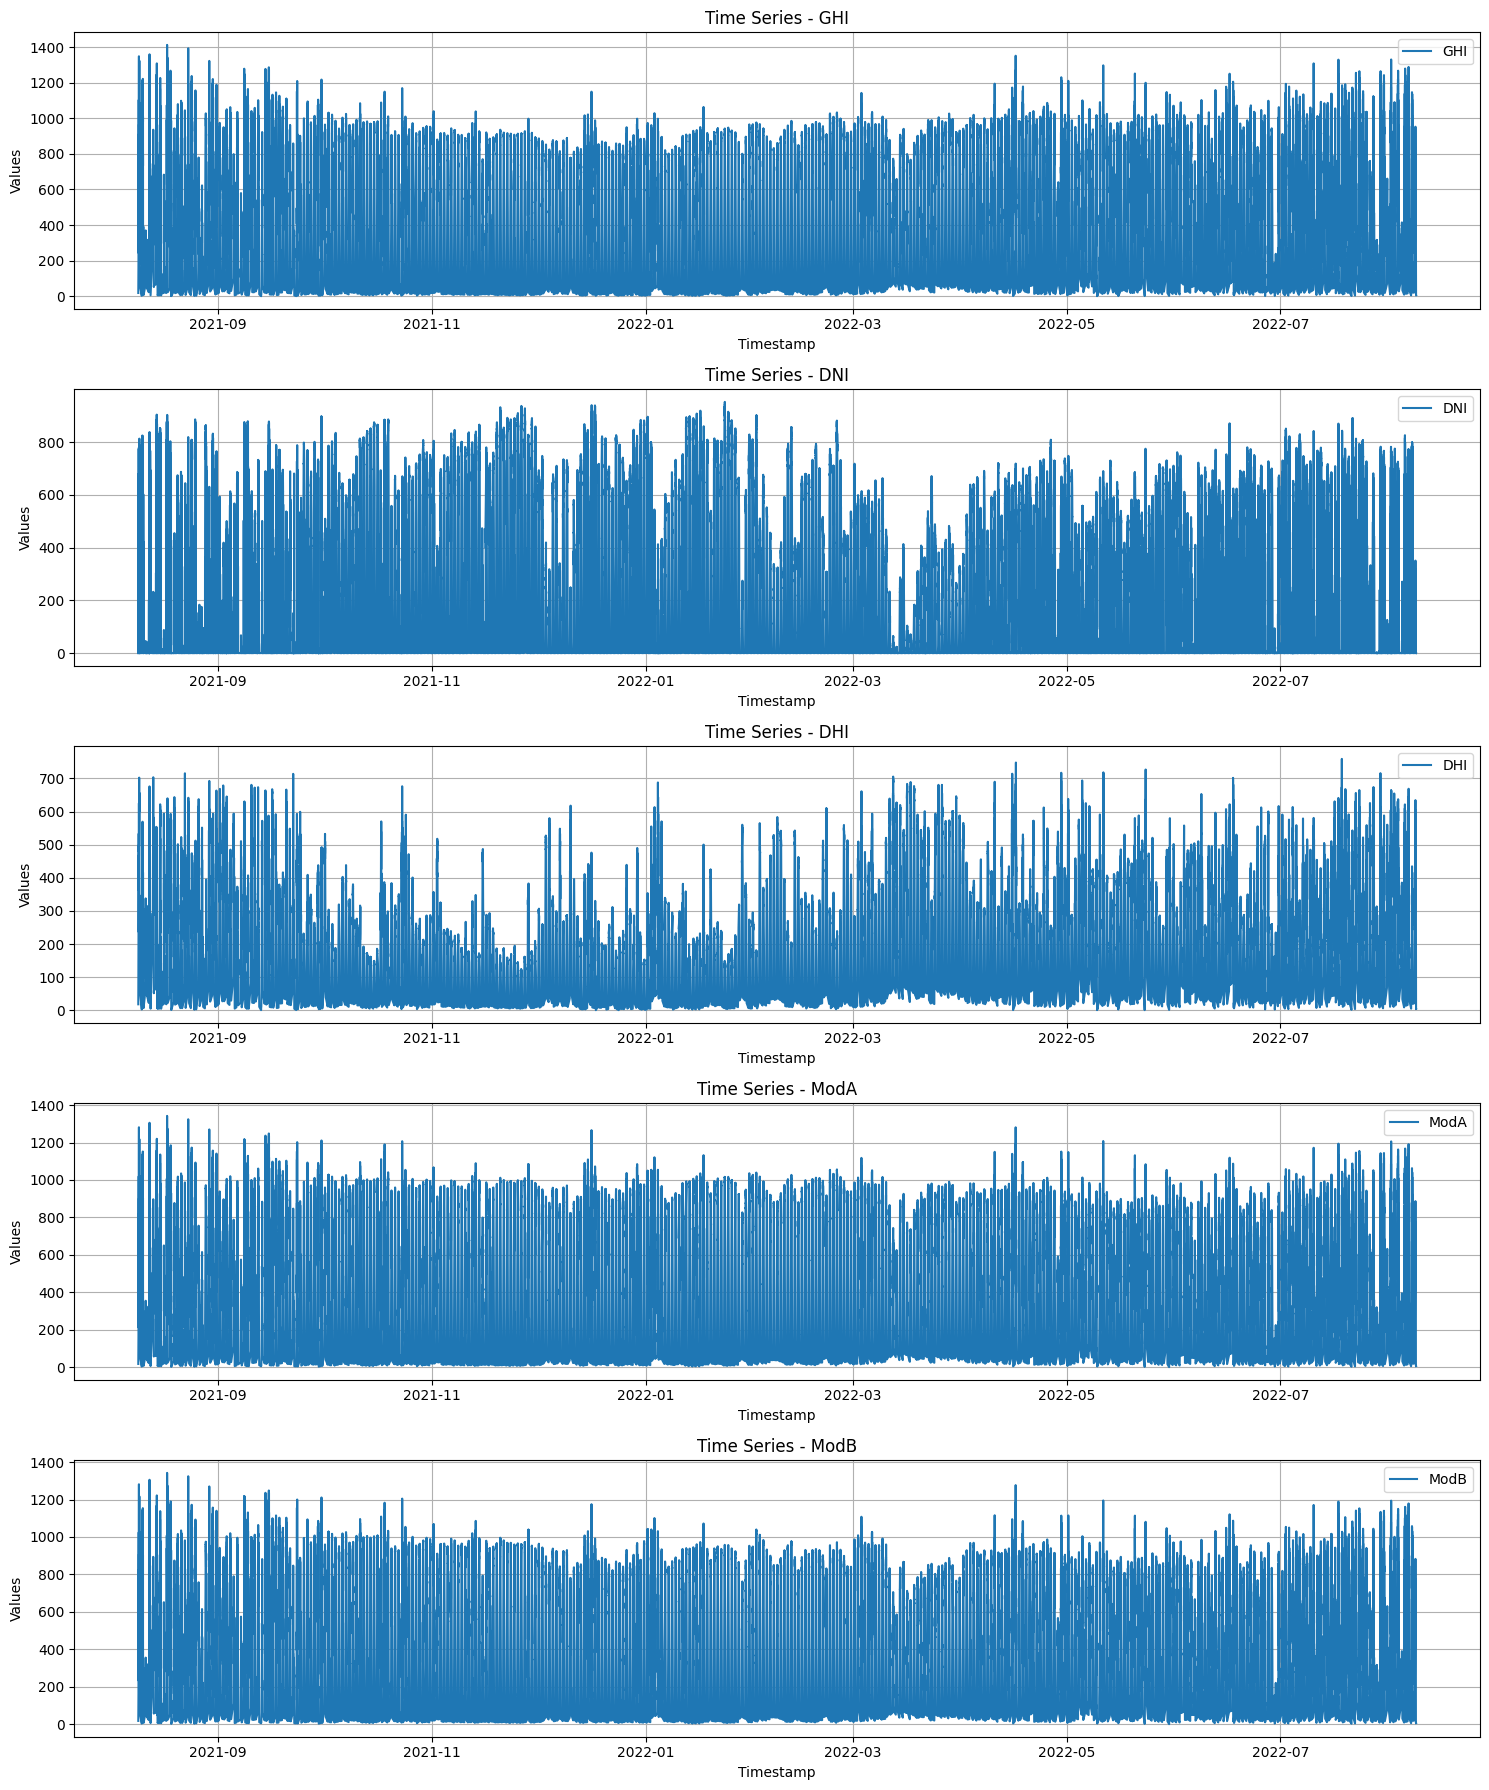

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Timestamp column is in datetime format
if 'Timestamp' in original_data.columns:
    original_data['Timestamp'] = pd.to_datetime(original_data['Timestamp'])

# Filter to include only rows where all specified columns have positive values
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
filtered_data = original_data[(original_data[columns_to_check] > 0).all(axis=1)]

# Create subplots for each column
fig, axes = plt.subplots(len(columns_to_check), 1, figsize=(15, 18))

# Iterate over each column and plot individually
for i, column in enumerate(columns_to_check):
    if column in filtered_data.columns:
        axes[i].plot(filtered_data['Timestamp'], filtered_data[column], label=f"{column}")
        axes[i].set_title(f"Time Series - {column}")
        axes[i].set_xlabel("Timestamp")
        axes[i].set_ylabel("Values")
        axes[i].grid()
        axes[i].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



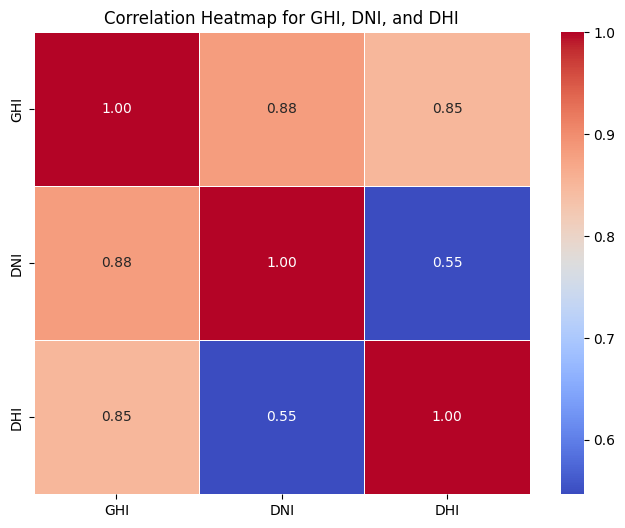

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation
columns_to_correlate = ['GHI', 'DNI', 'DHI']

# Calculate the correlation matrix
correlation_matrix = original_data[columns_to_correlate].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap for GHI, DNI, and DHI")
plt.show()


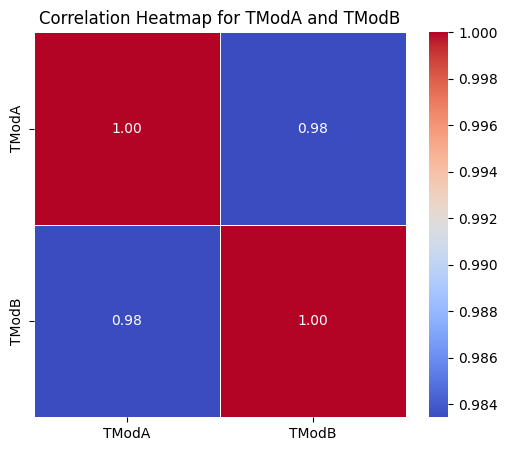

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only TModA and TModB for correlation
columns_to_correlate = ['TModA', 'TModB']

# Calculate the correlation matrix
correlation_matrix = original_data[columns_to_correlate].corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap for TModA and TModB")
plt.show()


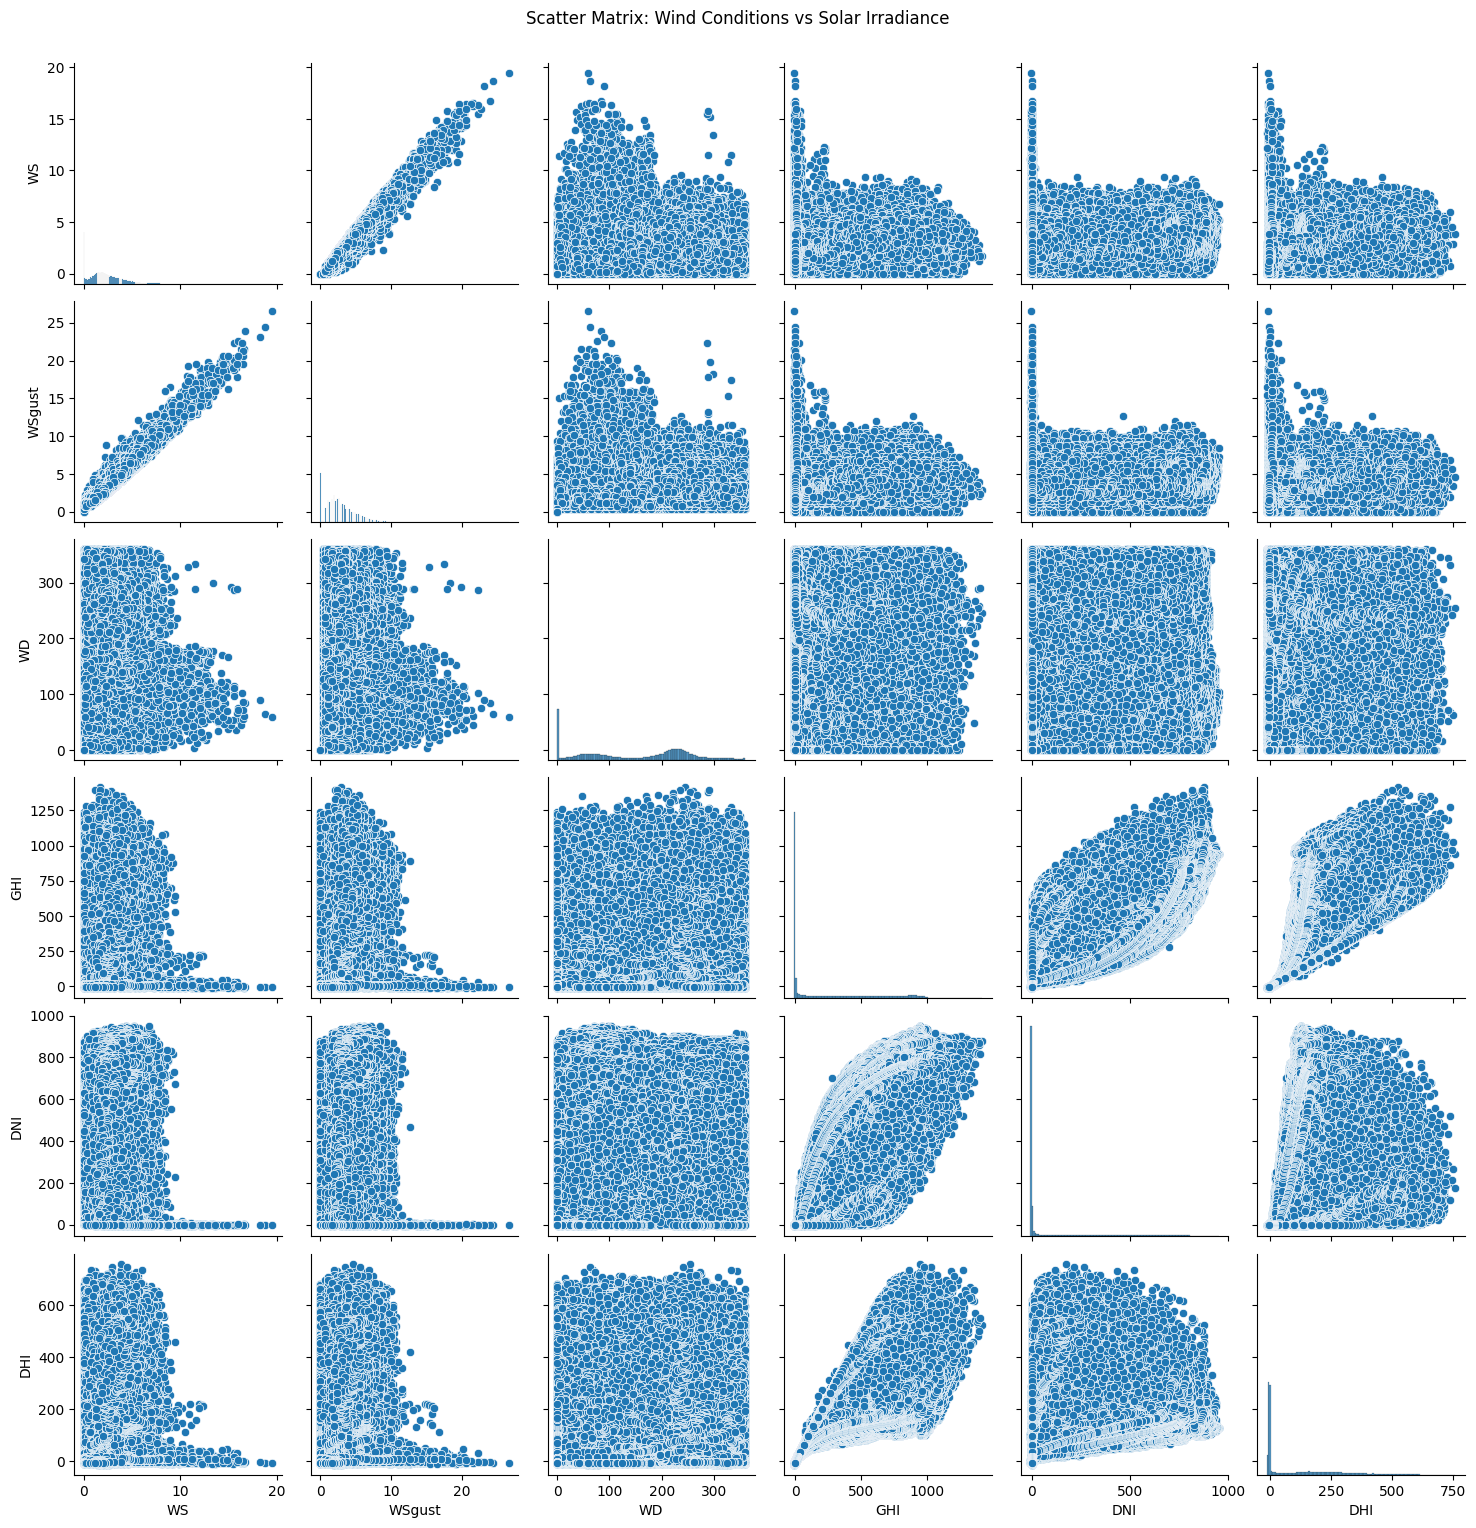

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns: Wind Speed (WS), Wind Gust (WSgust), Wind Direction (WD), and Solar Irradiance (GHI, DNI, DHI)
columns_to_investigate = ['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']

# Create a subset of the data with the selected columns
subset_data = original_data[columns_to_investigate]

# Generate the scatter matrix (pairplot)
sns.pairplot(subset_data)
plt.suptitle("Scatter Matrix: Wind Conditions vs Solar Irradiance", y=1.02)
plt.show()


c:\Users\FUAT\Documents\kaim-week-0\solar-farm-analysis\.venv\Lib\site-packages\windrose\windrose.py:667: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


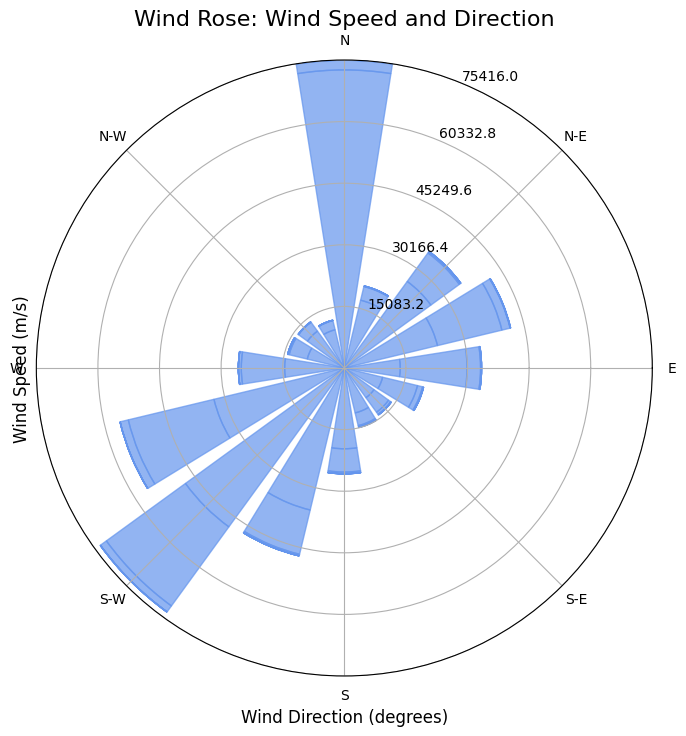

In [20]:

# Assuming 'original_data' is your DataFrame containing 'WD' and 'WS' columns
# Ensure the 'WD' and 'WS' columns are available
if 'WD' in original_data.columns and 'WS' in original_data.columns:
    # Create a figure for the wind rose
    fig = plt.figure(figsize=(10, 8))
    
    # Add a windrose subplot
    ax = fig.add_subplot(111, projection='windrose')
    
    # Plot wind direction (WD) vs wind speed (WS)
    ax.bar(original_data['WD'], original_data['WS'], bins=8, edgecolor='black', color='cornflowerblue', alpha=0.7)
    
    # Set the title and labels
    ax.set_title("Wind Rose: Wind Speed and Direction", fontsize=16)
    ax.set_xlabel("Wind Direction (degrees)", fontsize=12)
    ax.set_ylabel("Wind Speed (m/s)", fontsize=12)
    
    # Show the plot
    plt.show()


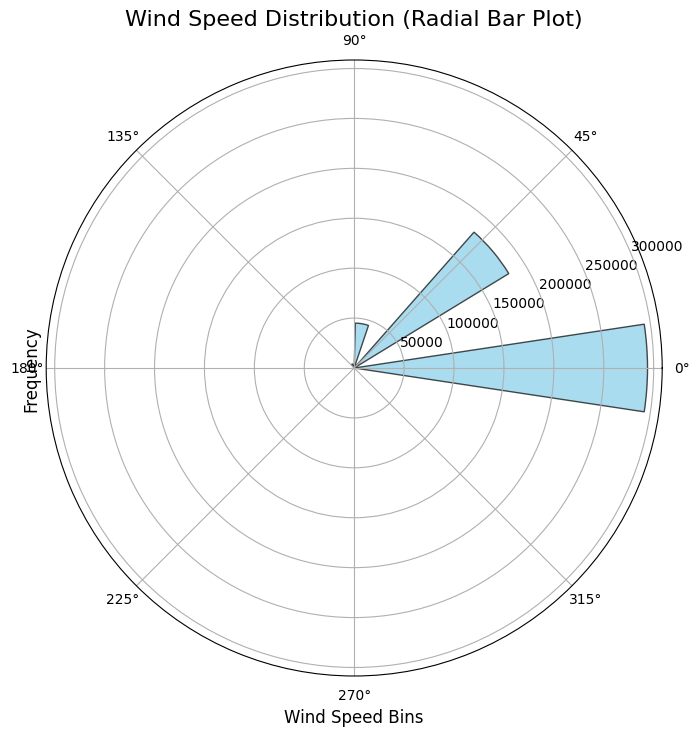

In [23]:


# Ensure the necessary columns exist
if 'WS' in original_data.columns:
    # Create bins for wind speed
    wind_speed_bins = np.linspace(original_data['WS'].min(), original_data['WS'].max(), 10)
    
    # Count how many values fall into each bin
    wind_speed_hist, bin_edges = np.histogram(original_data['WS'], bins=wind_speed_bins)
    
    # Create radial bar plot
    angles = np.linspace(0, 2 * np.pi, len(wind_speed_hist), endpoint=False)
    
    # Plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    
    ax.bar(angles, wind_speed_hist, width=0.3, bottom=0.0, color='skyblue', edgecolor='black', alpha=0.7)
    
    ax.set_title("Wind Speed Distribution (Radial Bar Plot)", fontsize=16)
    ax.set_xlabel("Wind Speed Bins", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    
    plt.show()


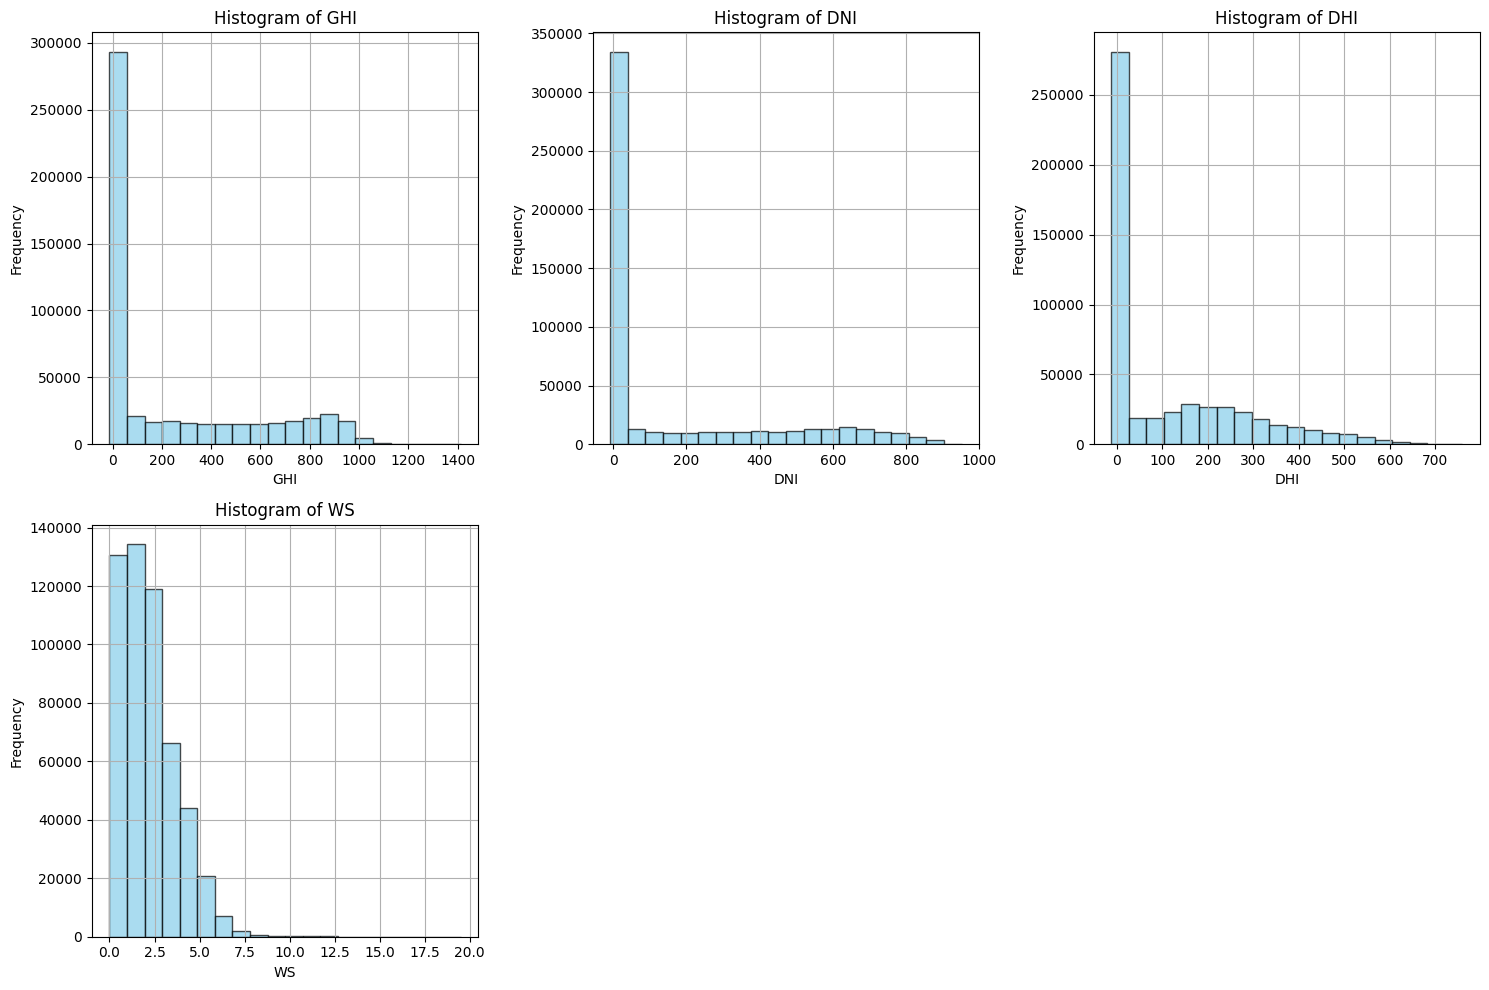

In [38]:


# List of columns to plot histograms for
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Temperature']  # Adjust column names if needed

# Set up a plot with multiple subplots
plt.figure(figsize=(15, 10))

# Loop through each column and plot a histogram
for i, column in enumerate(columns_to_plot, 1):
    if column in original_data.columns:
        plt.subplot(2, 3, i)  # 2 rows, 3 columns of subplots
        plt.hist(original_data[column].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # Drop NaN values if present
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Outliers based on Z-scores (Z > 3 or Z < -3):
          GHI    DNI    DHI     WS
0       False  False  False  False
1       False  False  False  False
2       False  False  False  False
3       False  False  False  False
4       False  False  False  False
...       ...    ...    ...    ...
525595  False  False  False  False
525596  False  False  False  False
525597  False  False  False  False
525598  False  False  False  False
525599  False  False  False  False

[525600 rows x 4 columns]


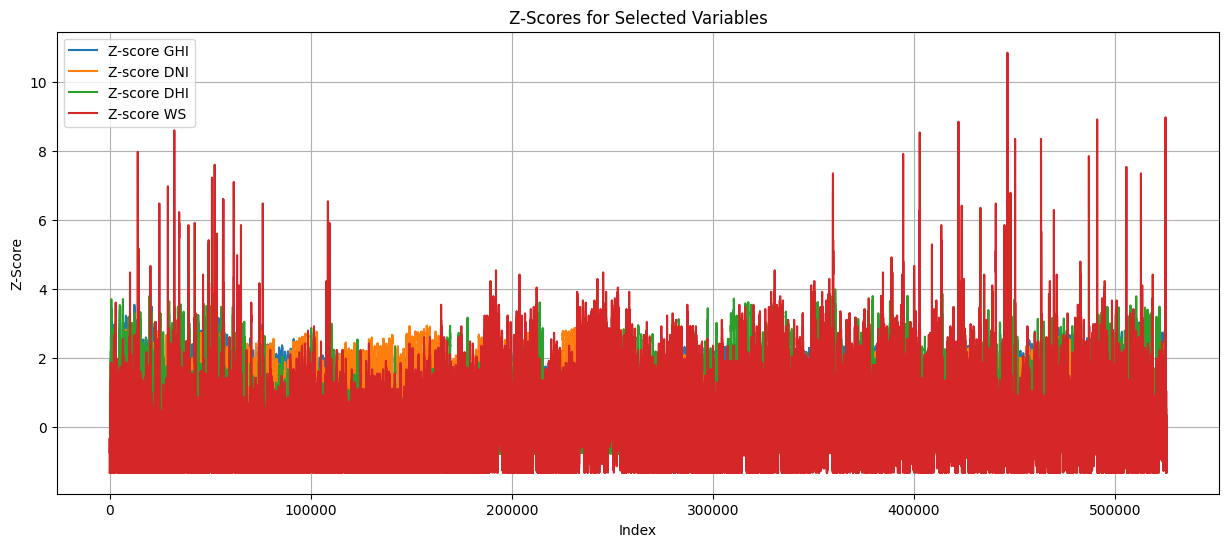

Rows with outliers:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672    2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673    2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
525105 2022-08-08 15:46:00     8.7   -0.2    8.6     9.0     8.8  21.7  98.7   
525107 2022-08-08 15:48:00     8.4   -0.1    8.3     8.8     8.6  21.7  98.7   
525119 2022-08-08 16:00:00     7.9    0.0    7.8     8.3     8.2  21.9  99.0   
525141 2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525151 2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   

         WS  WSgust

In [40]:
# Print the columns to verify the available data
print(original_data.columns)

# Correct the columns_to_check if necessary
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS']  # Make sure these columns exist
# If Temperature exists under a different name, use that name (e.g., 'Temp' or 'Temperature_1')

# Calculate Z-scores for each specified column
z_scores = original_data[columns_to_check].apply(lambda x: (x - x.mean()) / x.std())

# Flag data points with Z-scores greater than 3 or less than -3 (outliers)
outliers = (z_scores.abs() > 3)

# Display the outliers
print("Outliers based on Z-scores (Z > 3 or Z < -3):")
print(outliers)

# Visualize Z-scores for each column
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

for column in columns_to_check:
    if column in original_data.columns:
        plt.plot(z_scores.index, z_scores[column], label=f"Z-score {column}")

plt.title("Z-Scores for Selected Variables")
plt.xlabel("Index")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.show()

# Extract and view rows with outliers
outlier_rows = original_data[outliers.any(axis=1)]
print("Rows with outliers:")
print(outlier_rows)


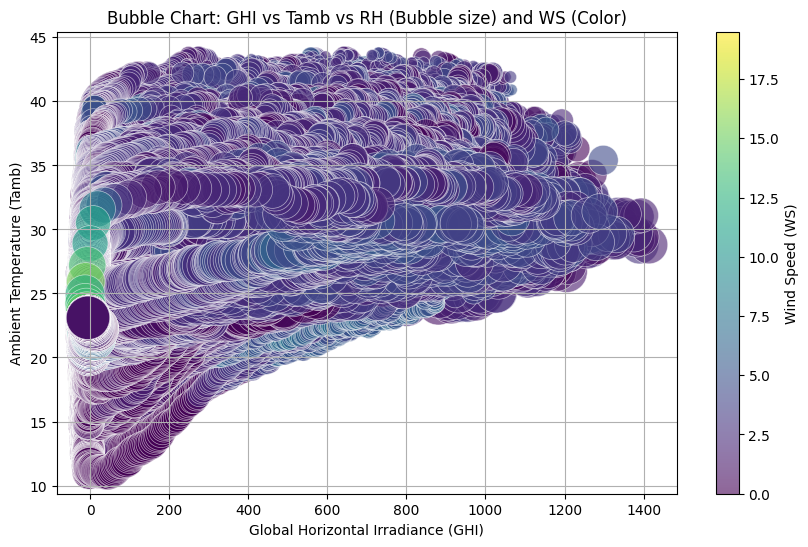

In [41]:
import matplotlib.pyplot as plt

# Ensure that the relevant columns exist in the data
# Assuming 'GHI', 'Tamb', 'WS', and 'RH' exist in the 'original_data' DataFrame

# Extract the relevant columns for GHI, Tamb, WS, and RH
x = original_data['GHI']  # Global Horizontal Irradiance (X-axis)
y = original_data['Tamb']  # Ambient Temperature (Y-axis)
size = original_data['RH']  # Bubble size based on Relative Humidity
color = original_data['WS']  # Optional: Color based on Wind Speed

# Create a scatter plot with bubble sizes
plt.figure(figsize=(10, 6))

# Create the bubble chart: scatter plot with varying sizes and colors
scatter = plt.scatter(x, y, s=size * 10, c=color, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)

# Add color bar for the Wind Speed
plt.colorbar(scatter, label='Wind Speed (WS)')

# Add title and labels
plt.title("Bubble Chart: GHI vs Tamb vs RH (Bubble size) and WS (Color)")
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (Tamb)")

# Show the plot
plt.grid(True)
plt.show()


In [46]:
# Adjust column names based on the actual dataset
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'Temperature']  # Update 'Temperature' if necessary

# If 'Temperature' is missing, remove it from the list or handle it
if 'Temperature' not in original_data.columns:
    columns_to_check.remove('Temperature')  # Remove 'Temperature' if not present

# Now calculate Z-scores only for available columns
z_scores = original_data[columns_to_check].apply(lambda x: (x - x.mean()) / x.std())

# Flag data points with Z-scores greater than 3 or less than -3 (outliers)
outliers = (z_scores.abs() > 3)

# Remove rows with outliers (or replace them with the median or another strategy)
original_data = original_data[~outliers.any(axis=1)]  # Drop rows with any outliers




In [ ]:
# Handling Missing Values and Anomalies
#--------------------------------------
# Replace negative values with NaN
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
original_data[columns_to_check] = original_data[columns_to_check].map(lambda x: x if x >= 0 else None)

# Fill missing values or drop rows
original_data.ffill( inplace=True)

print(missing_summary)


Timestamp             0
GHI                 391
DNI                 129
DHI                 391
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [ ]:

# Exploratory Data Analysis (EDA)
# --------------------------------

# Summary statistics
# ------------------
print(original_data.describe())



                 GHI            DNI            DHI           ModA  \
count  525209.000000  525471.000000  525209.000000  525600.000000   
mean      242.271685     167.555472     117.211871     236.589496   
std       330.061332     261.520521     157.392077     326.894859   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.200000       0.000000       0.200000       0.000000   
50%         2.500000       0.400000       1.700000       4.500000   
75%       483.800000     314.350000     216.400000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

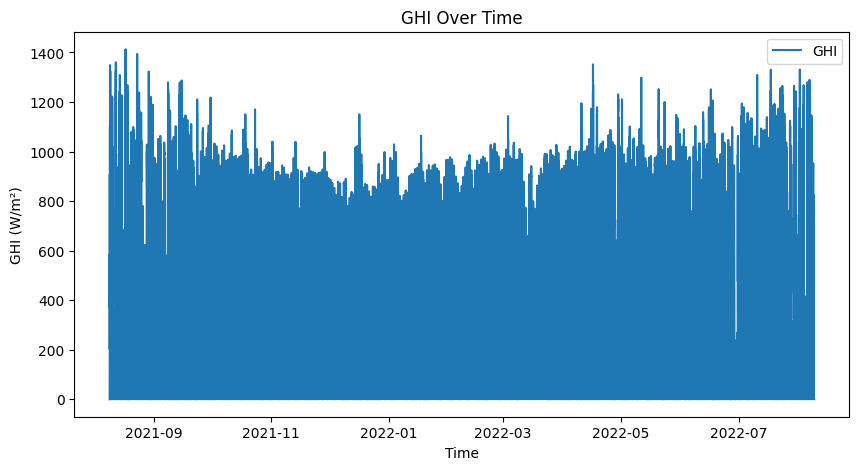

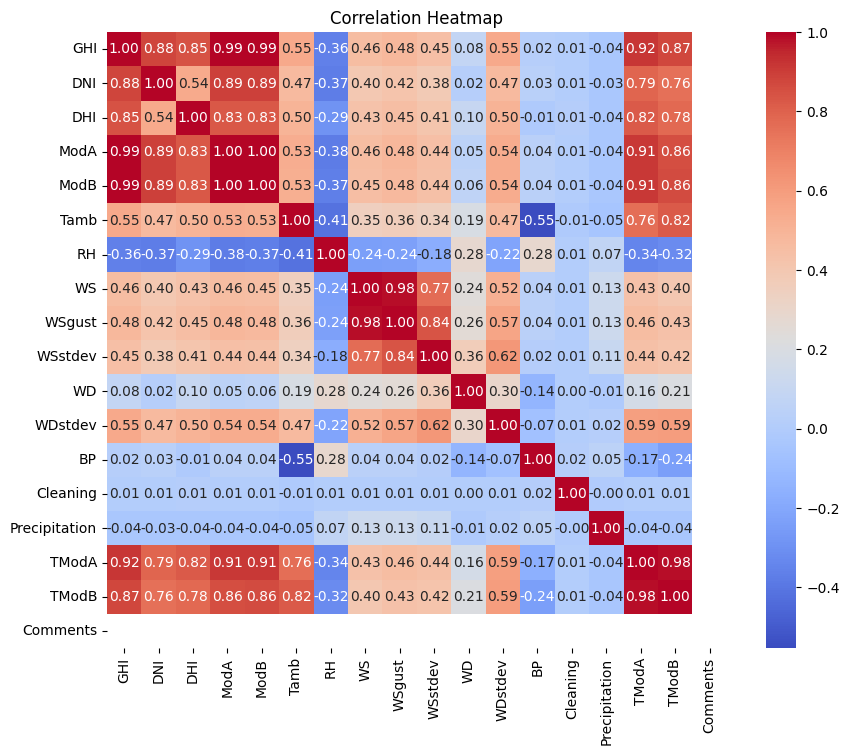

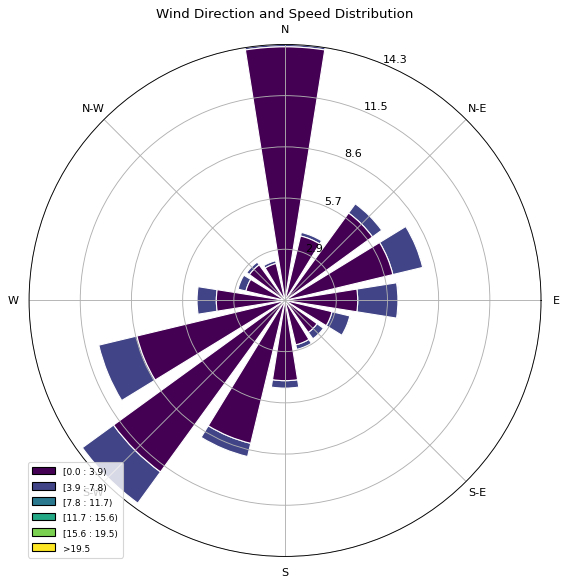

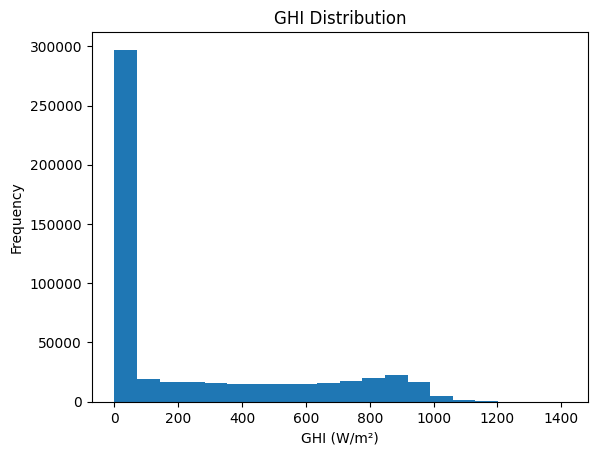

In [ ]:

# Time Series Plots
# -----------------

# Plot GHI over time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(data['Timestamp']), data['GHI'], label='GHI')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.show()

# Correlation Analysis
# --------------------
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Wind Rose for Wind Analysis
# ---------------------------

# Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Direction and Speed Distribution')
plt.show()

# Histogram
# ---------

# Histogram of GHI
data['GHI'].plot(kind='hist', bins=20, title='GHI Distribution')
plt.xlabel('GHI (W/m²)')
plt.show()
